# Proyek Pertama : Predictive Analytics
- **Nama:** Muhammad Alivian Sidiq
- **Email:** alivian7373@gmail.com
- **ID Dicoding:** alivian_7


# Data Understanding

## Import Library/Pakages

Improt semua library yang digunakan

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report,roc_curve, auc

## Data Loading
Sumber : Pima Indians Diabetes Database https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database <br>
Read the Dataset

In [3]:
df = pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Deskripsi Variabel
Berdasarkan informasi dari sumber dataset berikut adalah penjelasan untuk masing-masing kolom :

| No | Column Name |	Meaning |
|----|-------------|----------|
|1|Pregnancies|	Number of pregnancies the individual has had.
|2|	Glucose|	Plasma glucose concentration measured in a 2-hour oral glucose tolerance test.
|3|	BloodPressure|	Diastolic blood pressure measurement (mm Hg).
|4|	SkinThickness|	Triceps skin fold thickness (mm).
|5|	Insulin|	2-hour serum insulin (mu U/ml).
|6|	BMI	|Body mass index, calculated as weight in kg/(height in meters)^2.
|7|	DiabetesPedigreeFunction|	A function which scores the likelihood of diabetes based on family history.
|8|	Age|	Age of the individual in years.
|9|	Outcome|	This is the target variable, indicating whether the individual has diabetes (1) or not (0)

# Exploratory Data Analysis (EDA)

Menampilkan informasi tentang dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Deskripsi Statistik

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Grafik dari kolom 'Outcome' yang menampilkan distribusi jumlah dari No Diabeses dan Diabetes

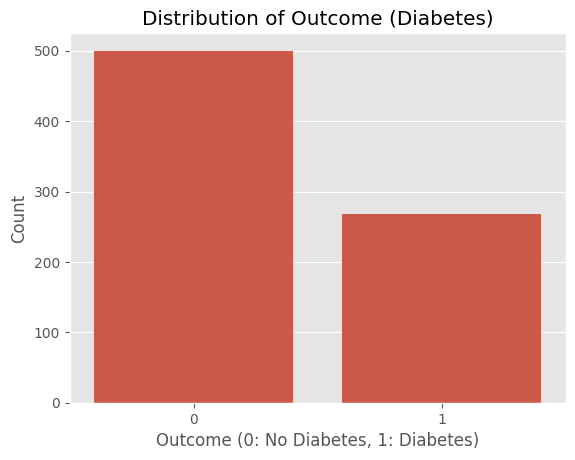

In [7]:
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome (Diabetes)')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()


Menampilkan korelasi antar kolom

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Interpretasi analisis korelasi yang dilakukan menunjukkan bahwa kolom outcome memiliki korelasi paling tinggi dengan kolom glukosa dengan skor korelasi sebesar 0,466. Artinya terdapat hubungan yang cukup kuat antara kadar glukosa dengan outcome diabetes, yang menunjukkan bahwa semakin tinggi kadar glukosa maka semakin besar kemungkinan seseorang menderita diabetes.

## Data Visualization
Heatmap korelasi matriks antar kolom

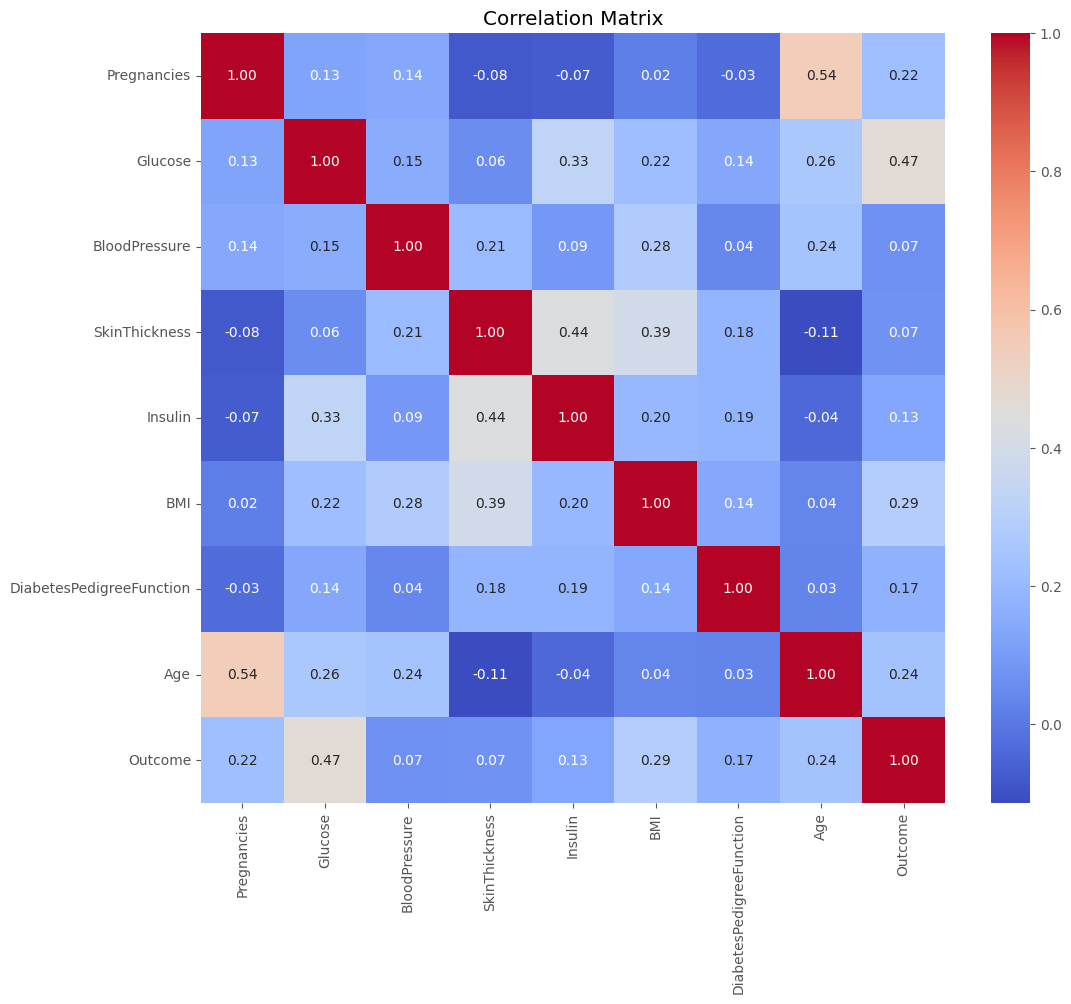

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Boxplot untuk memperlihatkan distribusi data, nilai outlier, dan nilai kuartil suatu variabel.

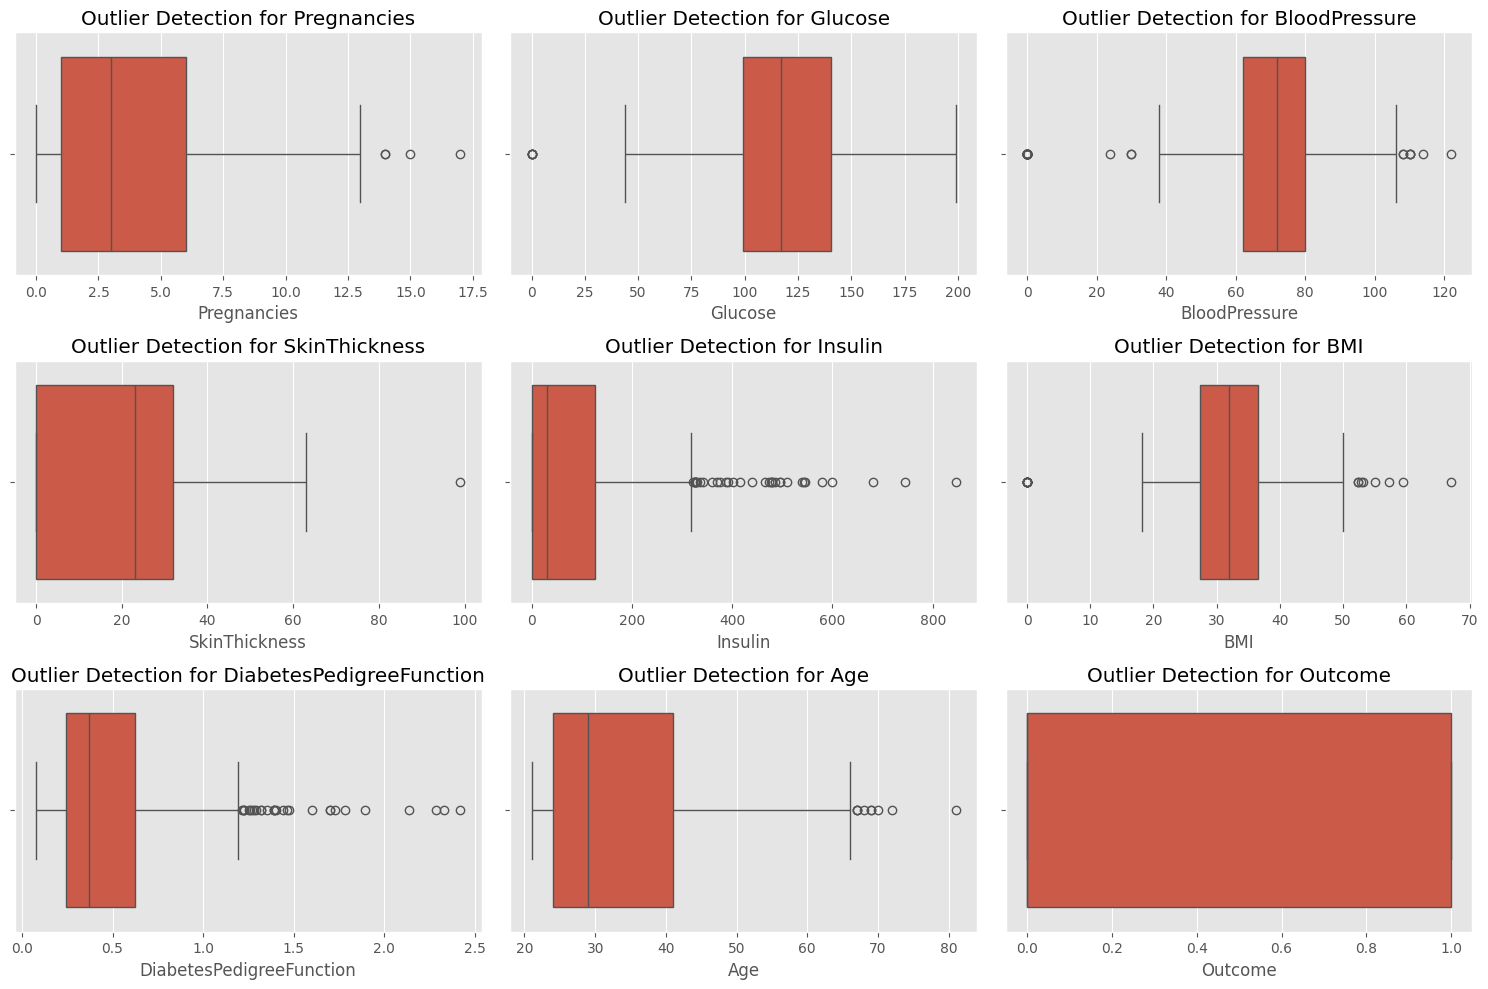

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for i, feature in enumerate(df.columns):
    row = i // 3
    col = i % 3
    sns.boxplot( x=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Outlier Detection for {feature}')

plt.tight_layout()
plt.show()

Violin Plot

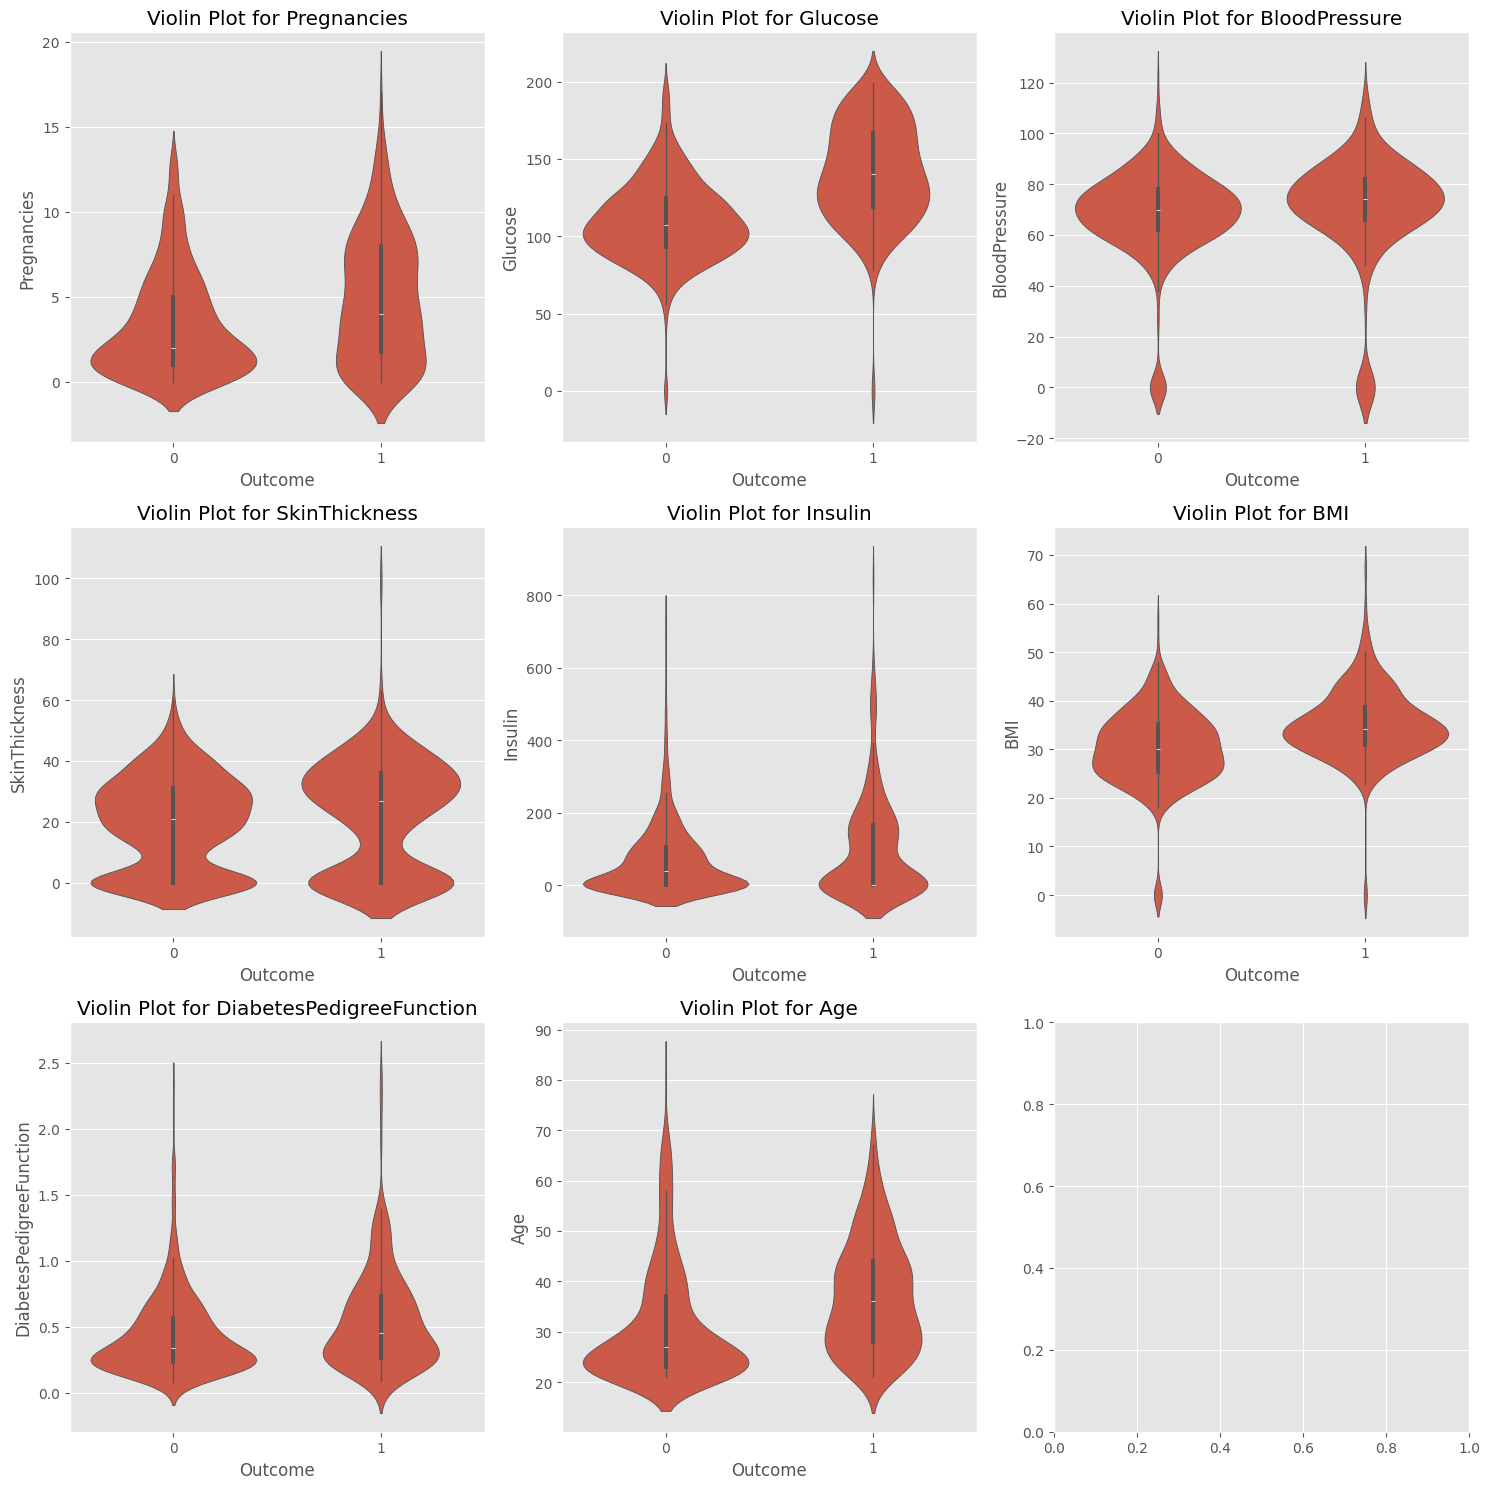

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, feature in enumerate(df.columns[:-1]):  # Exclude 'Outcome'
    row = i // 3
    col = i % 3
    sns.violinplot(x='Outcome', y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Violin Plot for {feature}')

plt.tight_layout()
plt.show()

#Data Preparation

## Cleaning Data
Menganti nilai 0 dangan NaN

In [12]:
df[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Menghitung nilai NaN

In [13]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Imputation

Imputasi pada setiap kolom numerik kecuali kolom “Outcome” berdasarkan nilai median kolom tersebut tergantung pada nilai “Outcome” (0 , 1)

In [15]:
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [17]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Handling Outlier with LOF
Deteksi outlier setiap kolom

In [18]:
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


Mendeteksi outlier menggunakan metode LOF (untuk mendeteksi outlier berdasarkan "local density deviation" dari suatu observasi ke observasi tetangganya.)

In [19]:
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

Dapatkan 20 nilai terkecil dari skor faktor outlier negatif yang dihasilkan oleh model LOF (Local Outlier Factor). Skor ini menunjukkan seberapa jauh setiap titik data dari tetangganya dalam konteks kepadatan lokal

In [20]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-3.30445978, -3.05893469, -2.48884101, -2.37289269, -2.15297995,
       -2.09708735, -2.0772561 , -2.01096252, -1.95255968, -1.86384019,
       -1.74003158, -1.72703492, -1.71674689, -1.70343883, -1.6688722 ,
       -1.64296768, -1.64190437, -1.61620872, -1.61369917, -1.60057603])

In [21]:
thresold = np.sort(df_scores)[7]
thresold

-2.0109625157063844

In [22]:
outlier = df_scores>thresold

Menghapus outlier berdasarkan nilai yang diperoleh dari model LOF (Local Outlier Factor)

In [23]:
df = df[outlier]

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Feature Engginering

Buat kolom BMI baru menjadi kategorikal

In [25]:
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [26]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

Buat kolom Insulin baru menjadi kategorikal

In [27]:
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [28]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

Buat kolom Glukosa baru menjadi kategorikal

In [29]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

## Encoding

Encoding kolom "NewBMI", "NewInsulinScore", "NewGlucose" dengan One-Hot Encoding

In [30]:
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,False,True,False,False,False,False,False,False,False,True
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,True,False,False,False,True,False,True,False,False
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,True,False,False,False,False,False,False,False,True
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,True,False,False,False,True,False,True,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False,True


Pisahkan kolom numerikal dan kategorikal

In [32]:
categorical_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [33]:
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [34]:
cols = X.columns
index = X.index

## Scaling Data

Scaling data menggunakan MinMaxScaler yang merubah data menjadi rentang 0-1

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns=cols, index=index)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.533333,0.528302,0.264103,0.314928,0.248416,0.568627
1,0.058824,0.264516,0.466667,0.415094,0.149573,0.171779,0.123529,0.196078
2,0.470588,0.896774,0.444444,0.471698,0.264103,0.104294,0.268778,0.215686
3,0.058824,0.290323,0.466667,0.301887,0.135043,0.202454,0.040271,0.000000
4,0.000000,0.600000,0.177778,0.528302,0.261538,0.509202,1.000000,0.235294


In [36]:
X = pd.concat([X, categorical_df], axis=1)

## Handling Imbalance Class

Penanganan Kelas Imblanace dalam Dataset menggunakan SMOTE

In [37]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [38]:
count_class_0 = (y_resampled == 0).sum()
print("Count Class 0 after SMOTE:", count_class_0)
count_class_1 = (y_resampled == 1).sum()
print("Count Class 1 after SMOTE:", count_class_1)

Count Class 0 after SMOTE: 496
Count Class 1 after SMOTE: 496


## Split Data Train & Test

Data train = 80% Data test = 20%

In [39]:
X_train, X_test, y_train , y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

In [40]:
X_train.columns = X_train.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')

# Modelling

Menggunakan Algoritma Machine Learning Random Forest, SVM , Logistic Regression, Gradient Boosting

## Random Forest

In [41]:
# Hyperparameter Tunnning
rand_clf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 130, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 20, None],
    'max_features': [0.5, 0.75, 'sqrt', 'log2'],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}
grid_search = GridSearchCV(rand_clf, param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, None],
                         'max_features': [0.5, 0.75, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 130, 150]})

In [42]:
best_model_rf = grid_search.best_estimator_
y_pred = best_model_rf.predict(X_test)

rand_acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

rand_acc_percent = rand_acc * 100

print(f"Accuracy Score: {rand_acc_percent:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy Score: 90.95%
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       103
           1       0.89      0.93      0.91        96

    accuracy                           0.91       199
   macro avg       0.91      0.91      0.91       199
weighted avg       0.91      0.91      0.91       199



## Logistic Regression

In [43]:
## Hyperparameter Tunnning
log_reg = LogisticRegression(random_state=42, max_iter=3000)

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search = GridSearchCV(log_reg, param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=3000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [44]:
best_model_lr = grid_search.best_estimator_
y_pred = best_model_lr.predict(X_test)
log_reg_acc = accuracy_score(y_test, best_model_lr.predict(X_test))

print("Accuracy Score:", log_reg_acc)
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8492462311557789
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       103
           1       0.83      0.86      0.85        96

    accuracy                           0.85       199
   macro avg       0.85      0.85      0.85       199
weighted avg       0.85      0.85      0.85       199



## SVM

In [45]:
# Hyperparameter Tunnning
svc = SVC(probability=True, random_state=42)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [46]:
svc_best = grid_search.best_estimator_
svc_best.fit(X_train, y_train)
y_pred = svc_best.predict(X_test)

svc_acc = accuracy_score(y_test, y_pred)

print("Accuracy Score:", svc_acc)
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8592964824120602
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       103
           1       0.84      0.88      0.86        96

    accuracy                           0.86       199
   macro avg       0.86      0.86      0.86       199
weighted avg       0.86      0.86      0.86       199




## Gradient Boosting

In [47]:
# Hyperparameter Tunnning

gb_clf = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(gb_clf, param_grid, n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]})

In [48]:
best_model_gb = grid_search.best_estimator_
best_model_gb.fit(X_train, y_train)
y_pred = best_model_gb.predict(X_test)
gb_acc = accuracy_score(y_test, y_pred)

print("Accuracy Score:", gb_acc)
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9246231155778895
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       103
           1       0.91      0.94      0.92        96

    accuracy                           0.92       199
   macro avg       0.92      0.93      0.92       199
weighted avg       0.93      0.92      0.92       199



#Evaluation

Perbandingan Performa model berdasarkan Akurasi

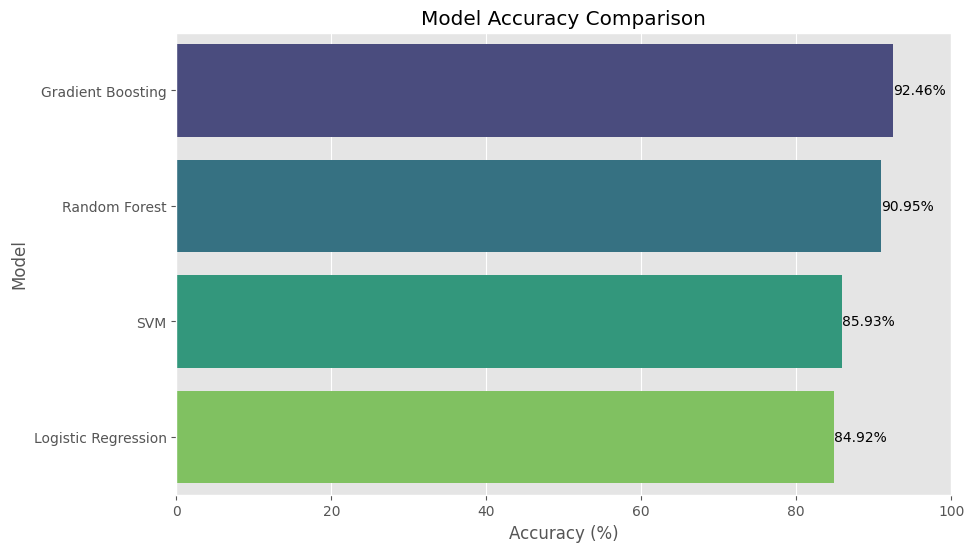

In [59]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Gradient Boosting', 'Random Forest'],
    'Score': [100*round(log_reg_acc,4), 100*round(svc_acc,4), 100*round(gb_acc,4), 100*round(rand_acc,4)]
})
# Mengurutkan DataFrame berdasarkan skor
models_sorted = models.sort_values(by='Score', ascending=False)

# Visualisasi data dengan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Model', data=models_sorted, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.xlim(0, 100)

# Menambahkan teks skor di setiap batang
for index, value in enumerate(models_sorted['Score']):
    plt.text(value, index, f'{value:.2f}%', va='center')


Perbandingan Performa model berdasarkan ROC

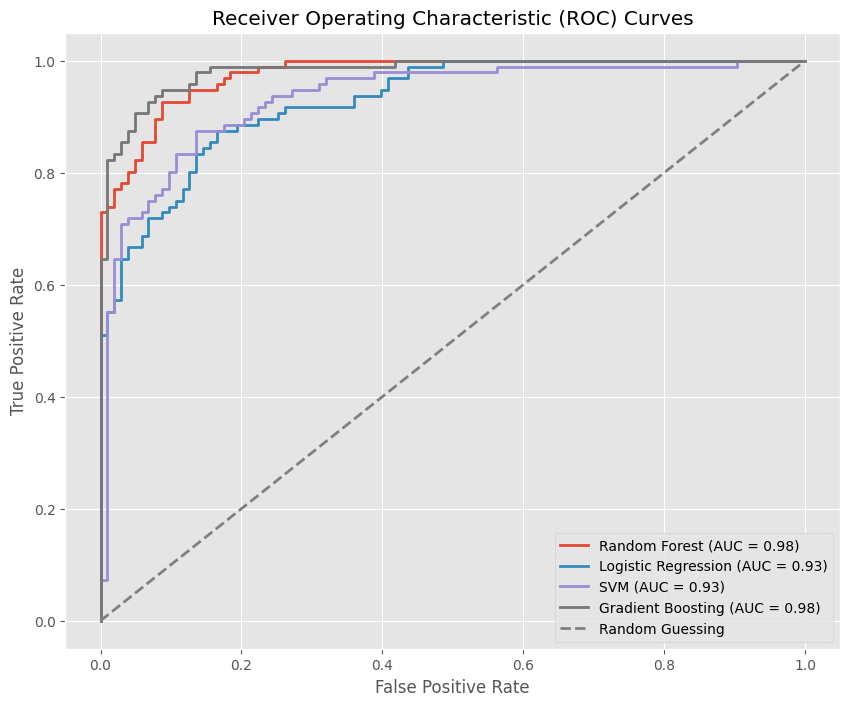

In [52]:
def plot_roc_curves(models, model_names, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for model, model_name in zip(models, model_names):
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc='lower right')
    plt.show()

models = [best_model_rf, best_model_lr, svc_best, best_model_gb]
model_names = ['Random Forest', 'Logistic Regression', 'SVM', 'Gradient Boosting']

plot_roc_curves(models, model_names, X_test, y_test)

Perbandingan Metrik Evaluasi Model secara terurut

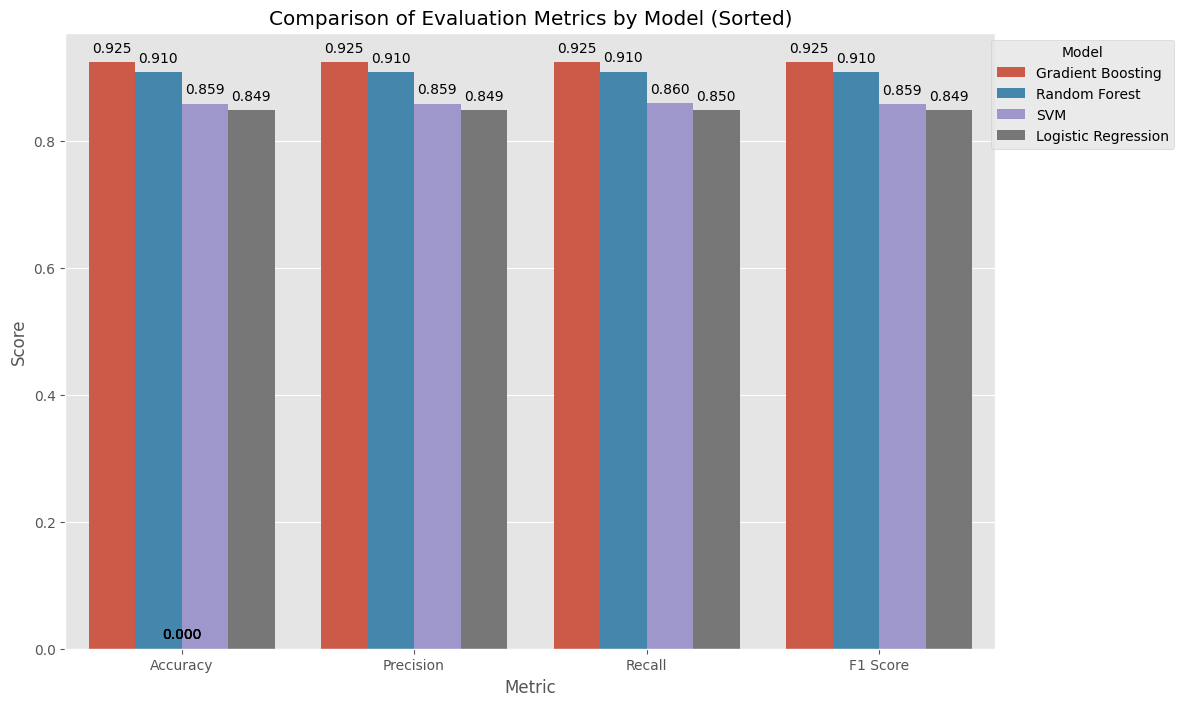

In [53]:
models = {
    'Random Forest': best_model_rf,
    'SVM': svc_best,
    'Gradient Boosting' :best_model_gb,
    'Logistic Regression': best_model_lr,
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return accuracy, precision, recall, f1

results = []

for model_name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
sorted_dfs = {metric: results_df.sort_values(by=metric, ascending=False) for metric in metrics}

melted_dfs = []
for metric, sorted_df in sorted_dfs.items():
    sorted_df['Rank'] = range(1, len(sorted_df) + 1)
    melted_df = pd.melt(sorted_df, id_vars=['Model', 'Rank'], value_vars=[metric],
                        var_name='Metric', value_name='Score')
    melted_dfs.append(melted_df)

results_melted = pd.concat(melted_dfs)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Metric', y='Score', hue='Model', data=results_melted, order=metrics)
plt.title('Comparison of Evaluation Metrics by Model (Sorted)')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.legend(title='Model', loc='upper right', bbox_to_anchor=(1.2, 1))

for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()